In [3]:
import numpy as np
from matplotlib import pyplot as plt

import data

%matplotlib inline

In [14]:
SYSNAME = 'MySystem'

MODELLABEL_LIST = [SYSNAME, 'PARSEC', 'NAS', 'OneSR', 'Legacy']
COLOR_LIST = ['#d62728', '#2ca02c', '#da8d00', '#9467bd', 'gray', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'steelblue', '#d62728']
HATCH_LIST=["", '\\\\', "", "/", "", "\\\\\\", ""]
LINESTYLE_LIST = ['-', 'dotted', '-.', '--', '-.', '--', '--']
DASH_LIST = [(2, 0, 2, 0),(4,0,4,2),(2,0,1,1,1),(1,1,1,1,1), (3,1,5,1,7), (3,0,3,1,1),]
ALPHA_LIST = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
LINETHICK=3.5
QOEFONT=26


## Sample line plot

<Figure size 640x480 with 0 Axes>

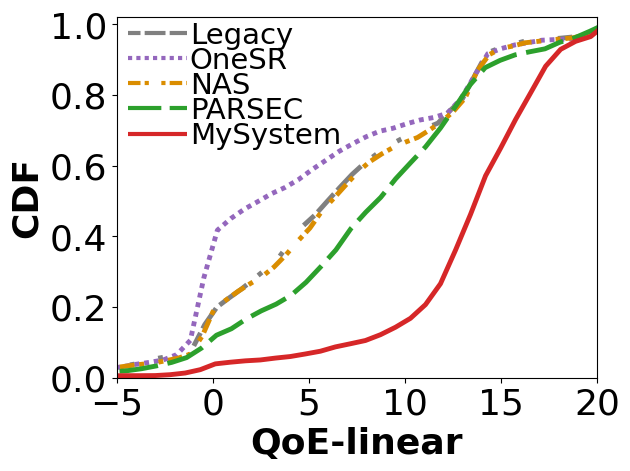

<Figure size 640x480 with 0 Axes>

In [15]:
cdf_list = data.cdf_list
qoeMode  = 'linear'

for idx in np.arange(len(cdf_list))[::-1]:
    (x, y) = cdf_list[idx]
    plt.plot(x, y, linestyle=LINESTYLE_LIST[idx], color=COLOR_LIST[idx], \
             linewidth=LINETHICK, dashes=DASH_LIST[idx], label=MODELLABEL_LIST[idx], \
                  alpha=ALPHA_LIST[idx])
plt.xticks(fontsize=QOEFONT)
plt.yticks(fontsize=QOEFONT)
plt.ylabel(f'CDF', fontsize=QOEFONT, fontweight='bold')
plt.xlabel(f'QoE-{qoeMode}', fontsize=QOEFONT, fontweight='bold')
plt.axis([-5, 20, 0, 1.02])

leg = plt.legend(loc=(0, .60), handlelength=2, fontsize=QOEFONT-5, labelspacing=-.1, handletextpad=0.1, frameon=False)
for line in leg.get_lines():
    line.set_linewidth(3.0)
       
plt.tight_layout()
plt.savefig('fig_lineplot.pdf', dpi=300)
plt.figure()

## Sample bar plot

xlist: [ 0  6 12], y_list: [1.38697370e+01 1.11386790e-02 6.66245728e-01]
xlist: [ 0  6 12], y_list: [10.35991865  0.04971675  1.24333841]
xlist: [ 0  6 12], y_list: [8.42453692 0.02406983 1.35570982]
xlist: [ 0  6 12], y_list: [8.14954836 0.01941131 1.39272805]
xlist: [ 0  6 12], y_list: [6.28317582 0.01143392 1.27452015]


<Figure size 640x480 with 0 Axes>

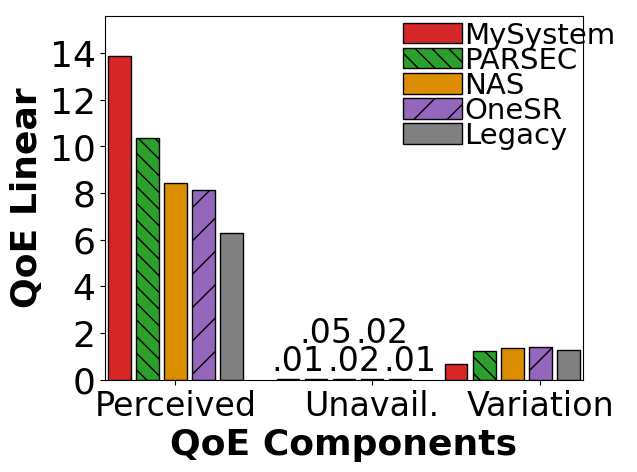

<Figure size 640x480 with 0 Axes>

In [16]:
qoeMode  = 'linear'

y_list_ds = np.array([[13.869736988467603, 0.011138679021663782, 0.6662457276408297],
          [10.359918651765243, 0.04971675250596295, 1.2433384122131461],
          [8.424536922261138, 0.02406983272562799, 1.3557098218779675],
          [8.149548355351842, 0.019411312824331187, 1.3927280457393778],
          [6.283175816468525, 0.011433918657774262, 1.274520152305711]])

ypn_list = [0.011, 0.05 , 0.024, 0.019, 0.011]

x_list = np.arange(3) * 6


for idx in range(len(y_list_ds)):
    y_list = y_list_ds[idx]
    plt.bar(x_list + idx, y_list, label=MODELLABEL_LIST[idx], color=COLOR_LIST[idx], \
            edgecolor = "black", hatch=HATCH_LIST[idx], linewidth=1)#yerr=y_err_list, 
    
    print (f'xlist: {x_list}, y_list: {y_list}')
    
plt.legend(loc=(.6, .6), handlelength=2, fontsize=QOEFONT-5, labelspacing=-.1, handletextpad=0.1, frameon=False)
plt.ylabel(f'QoE Linear', fontsize=QOEFONT, fontweight='bold')
plt.xlabel(f'QoE Components', fontsize=QOEFONT, fontweight='bold')
plt.yticks(fontsize=QOEFONT)
plt.xticks([2, 9, 15], ['Perceived', 'Unavail.', 'Variation'], fontsize=24)
plt.axis([-0.5, 15+1.5, 0, 15.6])

for idx, item in enumerate(ypn_list):
    plt.annotate(f'{item:.2f}'.lstrip('0'), (5.4 + idx, .4 if idx%2==0 else 1.6), fontsize=24)
    
plt.tight_layout()
plt.savefig('fig_barplot.pdf', dpi=300)
plt.figure()